In [9]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# SVD on one image

In [10]:
IMAGE_PATH = '../dataset/image/pic2.jpg'

In [11]:
image = Image.open(IMAGE_PATH)
img_arr = np.array(image)
img_arr = img_arr.reshape((-1,3)).swapaxes(0,1)

True
('10', '622 in all', ' left,left rate is : %f', 0.8560664206631077)
compressed image displayed here
True
('10', '622 in all', ' left,left rate is : %f', 0.614882029563475)
compressed image displayed here
True
('10', '622 in all', ' left,left rate is : %f', 0.6179631276974544)
compressed image displayed here


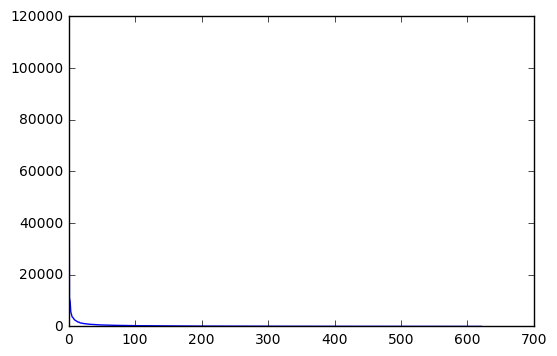

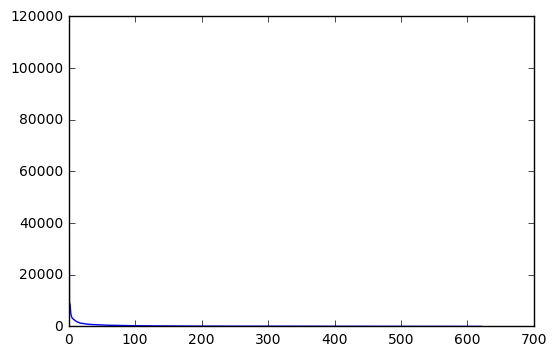

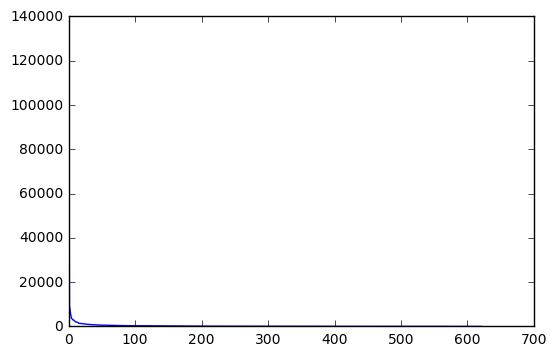

In [349]:
# select the k
k = 10

left_img_arr = []
prev_img_arr = []



for i,one_layer in enumerate(img_arr.astype(np.float64)):
#     convert one layer into one image
    
    one_image = one_layer.reshape((image.height,image.width))
    U,s,V = np.linalg.svd(one_image)
    plt.figure(i)
    plt.plot(range(len(s)),s)
#     check it 
    S = np.zeros((U.shape[0],V.shape[0]))
    _min = min(U.shape[0],V.shape[0])
    S[:_min,:_min] = np.diag(s)
    
    
    prev_img_arr.append(np.dot(U,np.dot(S,V)).reshape((1,-1)))
    print(np.allclose(one_image,prev_img_arr[i].reshape((image.height,image.width))))
    if(len(s)<10):
        k = len(s)
    singular_sum = s.sum()
    print('%d'%k,'%d in all'%len(s), ' left,left rate is : %f',left_rate)
    s = s[:k]
    left_singular_sum = s.sum()
    left_rate = float(left_singular_sum/singular_sum)
    
    print('compressed image displayed here')
    left_U = U[:,:k]
    left_V = V[:k,:]
    left_S = np.diag(s)
    left_image = np.dot(left_U,np.dot(left_S,left_V))
    left_layer = left_image.reshape((-1,1))
#     left_layer = mean + left_layer
    left_img_arr.append(left_layer)


In [350]:
# for left_img_arr

left_img_arr = np.array(left_img_arr).reshape(3,-1)
prev_img_arr = np.array(prev_img_arr).reshape(3,-1)

* regularize all the pixel in the image

In [351]:
left_img_arr[left_img_arr<0]=0
left_img_arr[left_img_arr>255]=255

* check if there is some loss happening

In [ ]:
print(np.allclose(img_arr,prev_img_arr))

* print all detail in arr

In [353]:
prev_img_arr = prev_img_arr.astype(np.int64).astype(np.uint8)
left_img_arr =left_img_arr.astype(np.int64).astype(np.uint8)

In [354]:
print(prev_img_arr)
print(img_arr)
print(left_img_arr)

array([[168, 166, 167, ...,  24,  34,  26],
       [169, 169, 170, ...,  39,  45,  42],
       [188, 187, 188, ...,  58,  63,  57]], dtype=uint8)

In [357]:
print(np.allclose(img_arr,prev_img_arr))

False


In [358]:
left_image = Image.fromarray(left_img_arr.swapaxes(0,1).reshape((image.height,image.width,-1)),'RGB')
prev_image = Image.fromarray(prev_img_arr.swapaxes(0,1).reshape((image.height,image.width,-1)),'RGB')

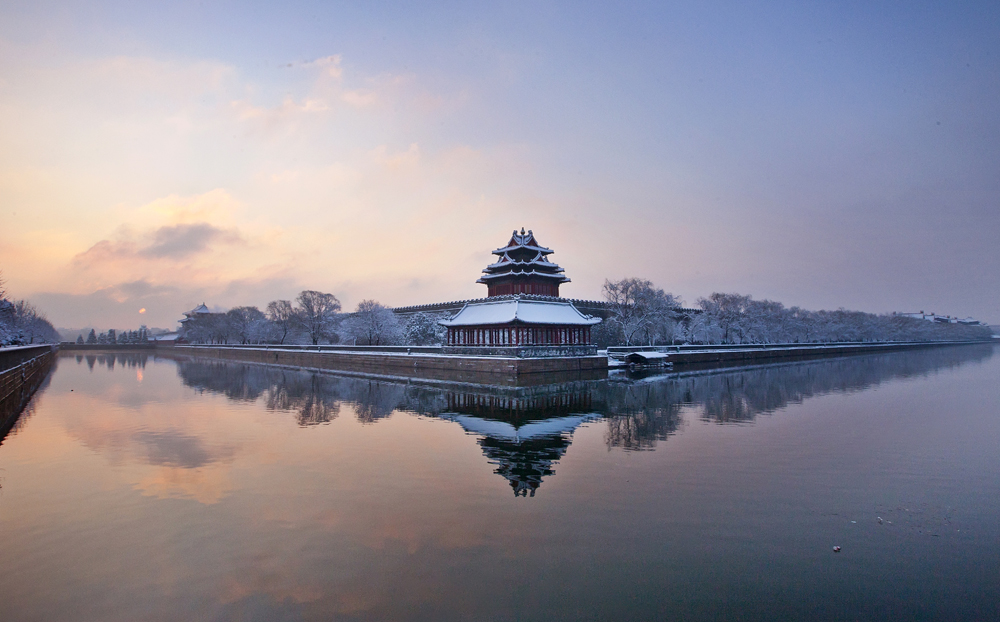

In [359]:
Image.fromarray(img_arr.swapaxes(0,1).reshape((image.height,image.width,-1)),'RGB')

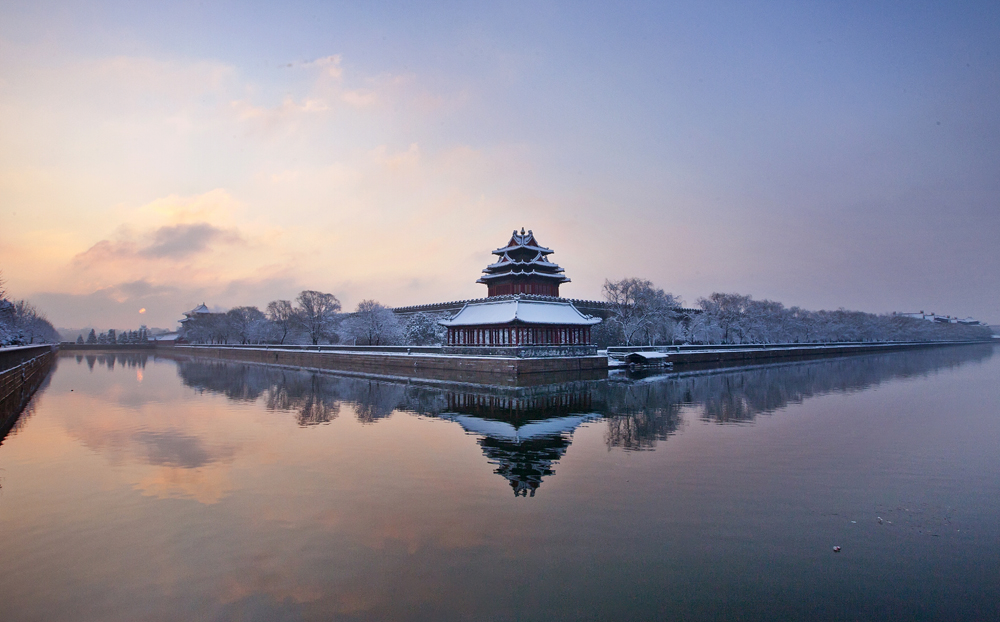

In [360]:
prev_image

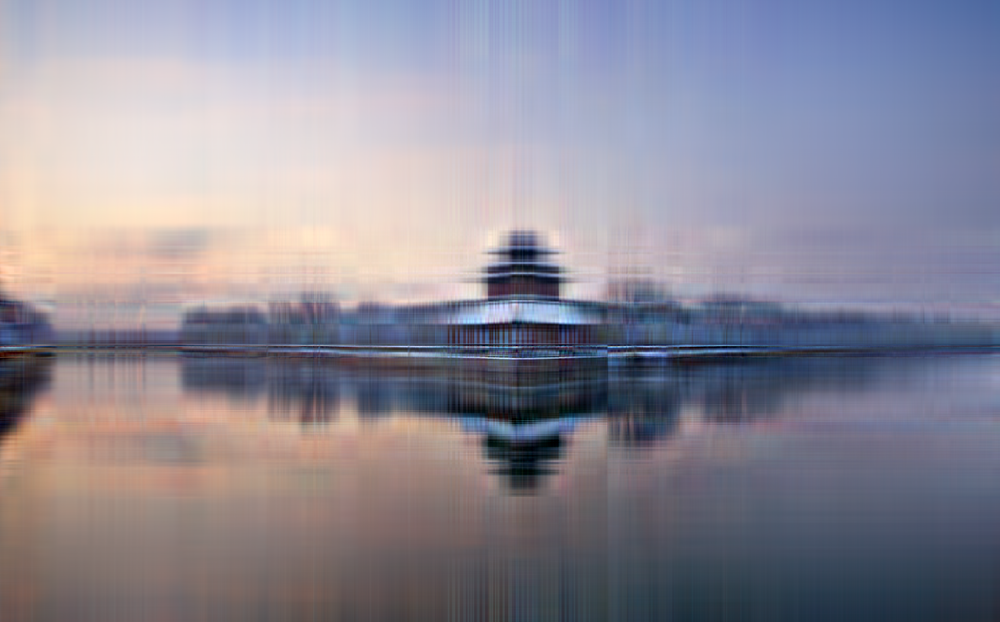

In [361]:
left_image